In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
# 저장한 리뷰 정보 불러오기
df = pd.read_csv('kream_reviews.csv', encoding = 'utf-8')
df = df.drop(['Unnamed: 0'], axis = 1) # 불필요한 칼럼 삭제
df

,리뷰내용,별점,리뷰공감수
0,"검수기준이 분명하게 ""기본 품질 확인 및 정가품 판정업무를 수행하고 있습니다."" 라...",1,403
1,발매정보 확인할 때 유용하게 사용중입니다 다만 푸시알림으로 모든 신발에 대해서라도 ...,5,708
2,"검수, 배송기간은 일정하지 않은듯 하고...검수가 비교적 신뢰성있는 편이긴 하지만 ...",2,954
3,"스타일에 올린 사진 수정 기능이 부족해요. 사진 순서 바꾸기, 여러 장 올렸을 때 ...",3,3
4,기존 비밀번호도 틀리다하고 새로 바꿨더니 그것도 틀리다하고 한번 더 했더니 로그인 ...,1,8
...,...,...,...
1968,좋아용,5,1
1969,good,5,0
1970,조음,5,0
1971,별로,1,0


In [3]:
df.isnull().sum()

리뷰내용     0
별점       0
리뷰공감수    0
dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1973 entries, 0 to 1972
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   리뷰내용    1973 non-null   object
 1   별점      1973 non-null   int64 
 2   리뷰공감수   1973 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 46.4+ KB


In [5]:
!pip install konlpy==0.5.2 jpype1 Jpype1-py3


  Using cached JPype1-py3-0.5.5.4.tar.gz (88 kB)
  ERROR: Command errored out with exit status 1:
   command: /Users/zoe/opt/anaconda3/bin/python -u -c 'import sys, setuptools, tokenize; sys.argv[0] = '"'"'/private/var/folders/zk/x50d25nx25b_ljl7t7yzzpkc0000gn/T/pip-install-6irwwv38/jpype1-py3_ad602d668b4644ab9b86e7e66845e3d2/setup.py'"'"'; __file__='"'"'/private/var/folders/zk/x50d25nx25b_ljl7t7yzzpkc0000gn/T/pip-install-6irwwv38/jpype1-py3_ad602d668b4644ab9b86e7e66845e3d2/setup.py'"'"';f=getattr(tokenize, '"'"'open'"'"', open)(__file__);code=f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' bdist_wheel -d /private/var/folders/zk/x50d25nx25b_ljl7t7yzzpkc0000gn/T/pip-wheel-b306ghlg
       cwd: /private/var/folders/zk/x50d25nx25b_ljl7t7yzzpkc0000gn/T/pip-install-6irwwv38/jpype1-py3_ad602d668b4644ab9b86e7e66845e3d2/
  Complete output (60 lines):
  
  ********* DEPRECATION WARNING *********
  ********* DEPRECATION WARNING *********
  


In [6]:
# 정규 표현식 함수 정의

import re

def apply_regular_expression(text):
    hangul = re.compile('[^ ㄱ-ㅣ 가-힣]')  # 한글 추출 규칙: 띄어 쓰기(1 개)를 포함한 한글
    result = hangul.sub('', text)  # 위에 설정한 "hangul"규칙을 "text"에 적용(.sub)시킴
    return result

In [7]:
apply_regular_expression(df['리뷰내용'][0])


'검수기준이 분명하게 기본 품질 확인 및 정가품 판정업무를 수행하고 있습니다 라고 답변이 왔는데 실밥이 다 터지고 다른 색에 실이 끼어져있는 확실한 가품이 왔다 그리고 제조 공정 및 자수 공정에서 발생하는 사항이므로 어쩔 수 없다 라고 변명을 하네 그럼 기본 품질은 뭘 판정업무 한다는거냐 일 뭣같이 처리한다 진짜로'

In [8]:
from konlpy.tag import Okt
from collections import Counter

In [9]:
apply_regular_expression(df['리뷰내용'][0])

'검수기준이 분명하게 기본 품질 확인 및 정가품 판정업무를 수행하고 있습니다 라고 답변이 왔는데 실밥이 다 터지고 다른 색에 실이 끼어져있는 확실한 가품이 왔다 그리고 제조 공정 및 자수 공정에서 발생하는 사항이므로 어쩔 수 없다 라고 변명을 하네 그럼 기본 품질은 뭘 판정업무 한다는거냐 일 뭣같이 처리한다 진짜로'

In [10]:
okt = Okt()  # 명사 형태소 추출 함수
nouns = okt.nouns(apply_regular_expression(df['리뷰내용'][0]))
nouns

['검수',
 '기준',
 '기본',
 '품질',
 '확인',
 '및',
 '정가',
 '품',
 '판정',
 '업무',
 '수행',
 '답변',
 '실밥',
 '다른',
 '색',
 '실',
 '가품',
 '제조',
 '공정',
 '및',
 '자수',
 '공정',
 '발생',
 '사항',
 '므',
 '수',
 '변명',
 '기본',
 '품질',
 '뭘',
 '판정',
 '업무',
 '거',
 '일',
 '뭣',
 '처리',
 '진짜']

In [11]:
# 말뭉치 생성
corpus = "".join(df['리뷰내용'].tolist())
corpus

'검수기준이 분명하게 "기본 품질 확인 및 정가품 판정업무를 수행하고 있습니다." 라고 답변이 왔는데 실밥이 다 터지고 다른 색에 실이 끼어져있는 확실한 가품이 왔다. 그리고 "제조 공정 및 자수 공정에서 발생하는 사항이므로 어쩔 수 없다." 라고 변명을 하네 그럼 기본 품질은 뭘 판정업무 한다는거냐??? 일 뭣같이 처리한다 진짜로발매정보 확인할 때 유용하게 사용중입니다 다만 푸시알림으로 모든 신발에 대해서라도 실시간 발매 혹은 응모알림을 받는 기능이 생겼으면 좋겠습니다. 그리고 \'직배송 불가인 발매정보\' 같은 경우를 제외하고 싶은데 그런 필터링 기능도 추가되었으면 합니다. 다음 업데이트에 반영되길 기대합니다 감사합니다검수, 배송기간은 일정하지 않은듯 하고...검수가 비교적 신뢰성있는 편이긴 하지만 공식적인 개런티인 택 유무가 검수기준에서 빠져있다? 사업방향성과 아이덴티티를 공감해내기 어려운 부분이 있다. 구매자입장에서는 유리한부분이 많으니 문제터지기 전에 이런저런것 뽑아먹고 빠지면 딱 히 손해볼건 없는 듯.스타일에 올린 사진 수정 기능이 부족해요. 사진 순서 바꾸기, 여러 장 올렸을 때 일부만 삭제 등등 이런 기본적인 기능들이 추가되면 좋겠습니다.기존 비밀번호도 틀리다하고 새로 바꿨더니 그것도 틀리다하고 한번 더 했더니 로그인 실패횟수 초과라고 접속이 제한 이라네요 한시간쯤 있다가 다시 똑같이 했더니 또 틀리다고 실패횟수 초과라는데 뭘 어쩌란건지 답답하네요박스를 뜯지도 않았는데 취소 및 환불 신청이 안 되네요 결국 같은 제품 2개 가지고 있어서 당근으로 판매해야 할것 같습니다. 차라리 무신사를 사용해야 할것 같습니다. 다시는 크림 사용 안 할것 같습니다 ㅜㅜ주문이 잘못되서 취소 할려니 아에 취소가 안되네요 잘못해도 그냥 사라는거네요 물건도 아직 대기중에 있는데도 안된다 하니 어이가 없네요수천만원하는 제품 거래를 하는데도 매크로성 답변만 날림. 크림 자체내에서도 최고가 제품들일텐데. 그냥 무관심함. 장사 잘된다고 너무하네 ㅋㅋ앱을 깔지 않으면 문의도 어렵네

In [12]:
apply_regular_expression(corpus)

'검수기준이 분명하게 기본 품질 확인 및 정가품 판정업무를 수행하고 있습니다 라고 답변이 왔는데 실밥이 다 터지고 다른 색에 실이 끼어져있는 확실한 가품이 왔다 그리고 제조 공정 및 자수 공정에서 발생하는 사항이므로 어쩔 수 없다 라고 변명을 하네 그럼 기본 품질은 뭘 판정업무 한다는거냐 일 뭣같이 처리한다 진짜로발매정보 확인할 때 유용하게 사용중입니다 다만 푸시알림으로 모든 신발에 대해서라도 실시간 발매 혹은 응모알림을 받는 기능이 생겼으면 좋겠습니다 그리고 직배송 불가인 발매정보 같은 경우를 제외하고 싶은데 그런 필터링 기능도 추가되었으면 합니다 다음 업데이트에 반영되길 기대합니다 감사합니다검수 배송기간은 일정하지 않은듯 하고검수가 비교적 신뢰성있는 편이긴 하지만 공식적인 개런티인 택 유무가 검수기준에서 빠져있다 사업방향성과 아이덴티티를 공감해내기 어려운 부분이 있다 구매자입장에서는 유리한부분이 많으니 문제터지기 전에 이런저런것 뽑아먹고 빠지면 딱 히 손해볼건 없는 듯스타일에 올린 사진 수정 기능이 부족해요 사진 순서 바꾸기 여러 장 올렸을 때 일부만 삭제 등등 이런 기본적인 기능들이 추가되면 좋겠습니다기존 비밀번호도 틀리다하고 새로 바꿨더니 그것도 틀리다하고 한번 더 했더니 로그인 실패횟수 초과라고 접속이 제한 이라네요 한시간쯤 있다가 다시 똑같이 했더니 또 틀리다고 실패횟수 초과라는데 뭘 어쩌란건지 답답하네요박스를 뜯지도 않았는데 취소 및 환불 신청이 안 되네요 결국 같은 제품 개 가지고 있어서 당근으로 판매해야 할것 같습니다 차라리 무신사를 사용해야 할것 같습니다 다시는 크림 사용 안 할것 같습니다 ㅜㅜ주문이 잘못되서 취소 할려니 아에 취소가 안되네요 잘못해도 그냥 사라는거네요 물건도 아직 대기중에 있는데도 안된다 하니 어이가 없네요수천만원하는 제품 거래를 하는데도 매크로성 답변만 날림 크림 자체내에서도 최고가 제품들일텐데 그냥 무관심함 장사 잘된다고 너무하네 ㅋㅋ앱을 깔지 않으면 문의도 어렵네요 문의 한번 하러 앱을 깔았는데 앱이 오류가 계속 떠서 

In [13]:
# 전체 말뭉치(corpus)에서 명사 형태소 추출
nouns = okt.nouns(apply_regular_expression(corpus))
print(nouns)

['검수', '기준', '기본', '품질', '확인', '및', '정가', '품', '판정', '업무', '수행', '답변', '실밥', '다른', '색', '실', '가품', '제조', '공정', '및', '자수', '공정', '발생', '사항', '므', '수', '변명', '기본', '품질', '뭘', '판정', '업무', '거', '일', '뭣', '처리', '진짜', '발매', '정보', '확인', '때', '사용', '다만', '푸시', '알림', '모든', '신발', '대해', '실시간', '발매', '응모', '알림', '기능', '직', '배송', '불가', '발매', '정보', '경우', '제외', '필터', '링', '기능', '추가', '다음', '업데이트', '반영', '검수', '배송', '기간', '검수', '비교', '신뢰', '공식', '개런티', '택', '유무', '검수', '기준', '사업', '방향성', '아이덴티티', '공감', '부분', '구매', '입장', '부분', '문제', '전', '것', '손', '듯', '스타일', '사진', '수정', '기능', '사진', '순서', '여러', '장', '때', '일부', '삭제', '등등', '기본', '기능', '추가', '기존', '비밀번호', '그것', '한번', '더', '로그인', '실패', '횟수', '초과', '접속', '제한', '시간', '다시', '또', '실패', '횟수', '초과', '데', '뭘', '어쩌란건', '박스', '취소', '및', '환불', '신청', '안', '제품', '개', '가지', '당근', '판매', '차라리', '사', '사용', '크림', '사용', '안', '주문', '취소', '아', '취소', '잘못', '그냥', '사라', '거', '물건', '대기', '하니', '어이', '만원', '제품', '거래', '매크로', '답변', '날림', '크림', '자체', '내', '최고', '제품', '그냥', '장사', '앱

In [14]:
# 빈도 탐색
counter = Counter(nouns)

In [15]:
counter.most_common(30)

[('검수', 241),
 ('구매', 206),
 ('크림', 158),
 ('판매', 147),
 ('업데이트', 136),
 ('신발', 132),
 ('어플', 117),
 ('배송', 101),
 ('앱', 98),
 ('거래', 95),
 ('좀', 89),
 ('취소', 75),
 ('진짜', 64),
 ('제품', 61),
 ('이용', 59),
 ('것', 58),
 ('고객', 58),
 ('기준', 57),
 ('왜', 57),
 ('문의', 55),
 ('사람', 55),
 ('최고', 52),
 ('그냥', 51),
 ('굿', 51),
 ('때', 50),
 ('사용', 50),
 ('티', 50),
 ('시간', 49),
 ('수', 48),
 ('패널', 48)]

In [16]:
#available_counter = Counter({x: counter[x] for x in counter if len(x) > 1})
#available_counter.most_common(10)

In [17]:
stopwords = pd.read_csv("https://raw.githubusercontent.com/yoonkt200/FastCampusDataset/master/korean_stopwords.txt").values.tolist()
stopwords[:10]

[['휴'],
 ['아이구'],
 ['아이쿠'],
 ['아이고'],
 ['어'],
 ['나'],
 ['우리'],
 ['저희'],
 ['따라'],
 ['의해']]

In [18]:
kream_stopwords = ['크림']
for word in kream_stopwords:
    stopwords.append(word)

In [19]:
nouns = [x for x in nouns if len(x) > 1]  # 한글자 키워드 제거
nouns = [x for x in nouns if x not in stopwords]  # 불용어 제거
counter = Counter(nouns)
counter.most_common(30)

[('검수', 241),
 ('구매', 206),
 ('판매', 147),
 ('업데이트', 136),
 ('신발', 132),
 ('어플', 117),
 ('배송', 101),
 ('거래', 95),
 ('취소', 75),
 ('진짜', 64),
 ('제품', 61),
 ('이용', 59),
 ('고객', 58),
 ('기준', 57),
 ('문의', 55),
 ('사람', 55),
 ('최고', 52),
 ('그냥', 51),
 ('사용', 50),
 ('시간', 49),
 ('패널', 48),
 ('결제', 47),
 ('상품', 44),
 ('센터', 44),
 ('가격', 43),
 ('계속', 41),
 ('최악', 41),
 ('다시', 39),
 ('사이즈', 39),
 ('처리', 37)]

# 워드클라우드

In [20]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from collections import Counter
from konlpy.tag import Okt
from PIL import Image
import numpy as np

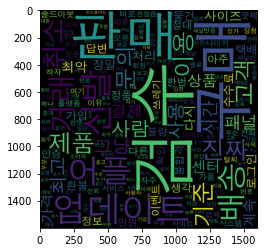

In [21]:
wc = WordCloud(font_path='AppleGothic', width=800, height=800, scale=2.0, max_font_size=250)
gen = wc.generate_from_frequencies(counter)
plt.figure()
plt.imshow(gen)

In [22]:
wc.to_file('워드클라우드.png')

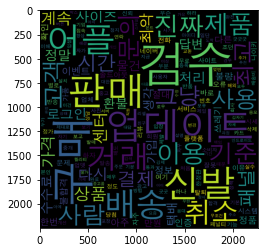

In [26]:
img = Image.open('신발모양.png')
img_array = np.array(img)

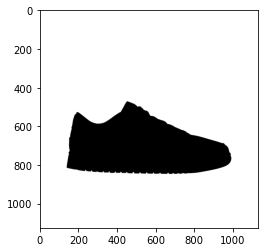

In [29]:
icon = Image.open('신발모양.png')    # 마스크가 될 이미지 불러오기 
plt.imshow(icon)

mask = Image.new("RGB", icon.size, (255,255,255))
mask.paste(icon,icon)
mask = np.array(mask)


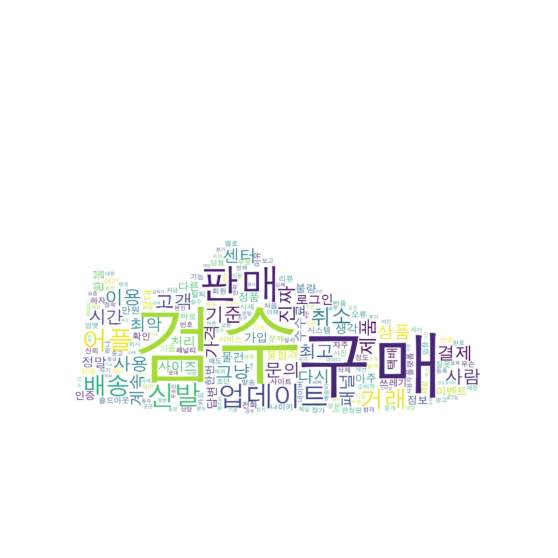

In [30]:
wc = WordCloud(font_path='AppleGothic', #폰트
               background_color='white',                              #배경색
               width=800, height=600 ,                                #사이즈설정
               max_words=200,                                         #단어갯수
               mask=mask)                                             #마스크설정   

cloud = wc.generate_from_frequencies(counter)                            #사전형태의 데이터

plt.figure(figsize=(10,10))                                           #액자사이즈설정
plt.axis('off')                                                       #테두리 선 없애기
plt.imshow(cloud,interpolation="bilinear")


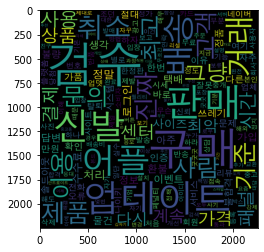

In [28]:
wc = WordCloud(font_path='AppleGothic', width=800, height=800, scale=2.0, max_font_size=250, mask = img_array)
gen2 = wc.generate_from_frequencies(counter)

plt.figure()
plt.imshow(gen2)

# 모델링

In [31]:
from sklearn.feature_extraction.text import CountVectorizer

def text_cleaning(text):
    hangul = re.compile('[^ ㄱ-ㅣ 가-힣]')  # 정규 표현식 처리
    result = hangul.sub('', text)
    okt = Okt()  # 형태소 추출
    nouns = okt.nouns(result)
    nouns = [x for x in nouns if len(x) > 1]  # 한글자 키워드 제거
    nouns = [x for x in nouns if x not in stopwords]  # 불용어 제거
    return nouns

vect = CountVectorizer(tokenizer = lambda x: text_cleaning(x))
bow_vect = vect.fit_transform(df['리뷰내용'].tolist())
word_list = vect.get_feature_names()
count_list = bow_vect.toarray().sum(axis=0)

In [32]:
counter = Counter(nouns)
counter.most_common(30)

[('검수', 241),
 ('구매', 206),
 ('판매', 147),
 ('업데이트', 136),
 ('신발', 132),
 ('어플', 117),
 ('배송', 101),
 ('거래', 95),
 ('취소', 75),
 ('진짜', 64),
 ('제품', 61),
 ('이용', 59),
 ('고객', 58),
 ('기준', 57),
 ('문의', 55),
 ('사람', 55),
 ('최고', 52),
 ('그냥', 51),
 ('사용', 50),
 ('시간', 49),
 ('패널', 48),
 ('결제', 47),
 ('상품', 44),
 ('센터', 44),
 ('가격', 43),
 ('계속', 41),
 ('최악', 41),
 ('다시', 39),
 ('사이즈', 39),
 ('처리', 37)]

In [33]:
word_list

['가게',
 '가격',
 '가관',
 '가기',
 '가끔',
 '가나',
 '가능',
 '가도',
 '가래',
 '가량',
 '가로',
 '가물',
 '가뭄',
 '가방',
 '가사',
 '가세',
 '가슴',
 '가시',
 '가야',
 '가요',
 '가입',
 '가장',
 '가족',
 '가죽',
 '가즈',
 '가지',
 '가지가지',
 '가짐',
 '가짜',
 '가치',
 '가품',
 '각광',
 '각종',
 '간다',
 '간사이',
 '간의',
 '간지',
 '간편',
 '갈수록',
 '감고',
 '감동',
 '감별',
 '감사',
 '감수',
 '감정',
 '갑임',
 '갑자기',
 '갑질',
 '강제',
 '강제업뎃',
 '강조',
 '강추',
 '강탈',
 '개굿',
 '개그',
 '개꿀',
 '개도',
 '개똥이',
 '개런티',
 '개무시',
 '개발',
 '개발자',
 '개보',
 '개봉',
 '개불',
 '개뿔',
 '개사',
 '개선',
 '개인',
 '개인정보',
 '개쩜',
 '개차',
 '개체',
 '개추',
 '개판',
 '개편',
 '갤럭시',
 '갯수',
 '갸꿀',
 '거기',
 '거나',
 '거래',
 '거래소',
 '거르',
 '거리',
 '거만',
 '거머',
 '거부',
 '거의',
 '거임',
 '거절',
 '거지',
 '거짓말',
 '거품',
 '걱정',
 '건가',
 '건안',
 '걸렀는데',
 '걸로',
 '걸론',
 '검불',
 '검색',
 '검수',
 '검증',
 '검품',
 '검합',
 '게다가',
 '게병',
 '게속',
 '게시판',
 '게임',
 '겐터',
 '겨우',
 '겨울',
 '결과',
 '결론',
 '결재',
 '결정',
 '결제',
 '경비실',
 '경영',
 '경우',
 '경쟁',
 '경찰',
 '경향',
 '경험',
 '계속',
 '계열',
 '계정',
 '계좌',
 '고가',
 '고객',
 '고객정보',
 '고고학자',
 '고려',
 '고민',
 '고발',
 '고삐',
 '고사하고',


In [34]:
count_list

array([ 1, 43,  2, ...,  1,  2,  1])

In [35]:
bow_vect.toarray()


array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [36]:
bow_vect.shape


(1973, 2019)

In [37]:
# "단어" - "총 등장 횟수" Matching

word_count_dict = dict(zip(word_list, count_list))
word_count_dict

{'가게': 1,
 '가격': 43,
 '가관': 2,
 '가기': 1,
 '가끔': 2,
 '가나': 1,
 '가능': 3,
 '가도': 2,
 '가래': 1,
 '가량': 1,
 '가로': 3,
 '가물': 1,
 '가뭄': 1,
 '가방': 1,
 '가사': 1,
 '가세': 1,
 '가슴': 1,
 '가시': 1,
 '가야': 1,
 '가요': 8,
 '가입': 30,
 '가장': 9,
 '가족': 1,
 '가죽': 1,
 '가즈': 1,
 '가지': 4,
 '가지가지': 1,
 '가짐': 4,
 '가짜': 1,
 '가치': 2,
 '가품': 24,
 '각광': 1,
 '각종': 1,
 '간다': 3,
 '간사이': 1,
 '간의': 2,
 '간지': 1,
 '간편': 1,
 '갈수록': 2,
 '감고': 1,
 '감동': 1,
 '감별': 1,
 '감사': 2,
 '감수': 1,
 '감정': 3,
 '갑임': 1,
 '갑자기': 9,
 '갑질': 3,
 '강제': 10,
 '강제업뎃': 1,
 '강조': 2,
 '강추': 2,
 '강탈': 2,
 '개굿': 4,
 '개그': 1,
 '개꿀': 3,
 '개도': 5,
 '개똥이': 1,
 '개런티': 1,
 '개무시': 1,
 '개발': 1,
 '개발자': 3,
 '개보': 1,
 '개봉': 3,
 '개불': 1,
 '개뿔': 1,
 '개사': 1,
 '개선': 13,
 '개인': 9,
 '개인정보': 2,
 '개쩜': 1,
 '개차': 1,
 '개체': 2,
 '개추': 1,
 '개판': 7,
 '개편': 2,
 '갤럭시': 5,
 '갯수': 1,
 '갸꿀': 1,
 '거기': 1,
 '거나': 5,
 '거래': 95,
 '거래소': 1,
 '거르': 1,
 '거리': 1,
 '거만': 1,
 '거머': 1,
 '거부': 4,
 '거의': 4,
 '거임': 1,
 '거절': 1,
 '거지': 4,
 '거짓말': 1,
 '거품': 2,
 '걱정': 8,
 '건가': 6,
 '건안': 1,
 '걸렀는데':

In [38]:
from sklearn.feature_extraction.text import TfidfTransformer

tfidf_vectorizer = TfidfTransformer()
tf_idf_vect = tfidf_vectorizer.fit_transform(bow_vect)

In [39]:
print(tf_idf_vect.shape)

(1973, 2019)


In [40]:
print(tf_idf_vect[0])

  (0, 1994)	0.13855540887390297
  (0, 1885)	0.35467165005276635
  (0, 1846)	0.3307840172130324
  (0, 1707)	0.13097005157857394
  (0, 1666)	0.11376888652938777
  (0, 1559)	0.20062076924328942
  (0, 1519)	0.14478450468712234
  (0, 1442)	0.19031701728359246
  (0, 1167)	0.35467165005276635
  (0, 1043)	0.1830063889249028
  (0, 971)	0.20062076924328942
  (0, 851)	0.17733582502638318
  (0, 712)	0.19031701728359246
  (0, 666)	0.17733582502638318
  (0, 357)	0.1354398167026889
  (0, 331)	0.1335565716390856
  (0, 251)	0.12039450901595582
  (0, 241)	0.306108394042151
  (0, 154)	0.3806340345671849
  (0, 102)	0.08848194853217053
  (0, 30)	0.14941769274829964


In [41]:
# 첫 번째 리뷰에서 모든 단어의 중요도 -- 0인 값까지 포함
print(tf_idf_vect[0].toarray().shape)
print(tf_idf_vect[0].toarray())

(1, 2019)
[[0. 0. 0. ... 0. 0. 0.]]


In [42]:
vect.vocabulary_

{'검수': 102,
 '기준': 251,
 '기본': 241,
 '품질': 1885,
 '확인': 1994,
 '정가': 1519,
 '판정': 1846,
 '업무': 1167,
 '수행': 971,
 '답변': 357,
 '실밥': 1043,
 '다른': 331,
 '가품': 30,
 '제조': 1559,
 '공정': 154,
 '자수': 1442,
 '발생': 666,
 '사항': 851,
 '변명': 712,
 '처리': 1707,
 '진짜': 1666,
 '발매': 663,
 '정보': 1527,
 '사용': 834,
 '다만': 333,
 '푸시': 1882,
 '알림': 1116,
 '모든': 588,
 '신발': 1033,
 '대해': 388,
 '실시간': 1046,
 '응모': 1316,
 '기능': 236,
 '배송': 678,
 '불가': 766,
 '경우': 121,
 '제외': 1555,
 '필터': 1905,
 '추가': 1744,
 '다음': 339,
 '업데이트': 1159,
 '반영': 658,
 '기간': 232,
 '비교': 795,
 '신뢰': 1032,
 '공식': 152,
 '개런티': 58,
 '유무': 1296,
 '사업': 832,
 '방향성': 674,
 '아이덴티티': 1083,
 '공감': 148,
 '부분': 757,
 '구매': 182,
 '입장': 1423,
 '문제': 624,
 '스타일': 995,
 '사진': 848,
 '수정': 968,
 '순서': 974,
 '여러': 1181,
 '일부': 1403,
 '삭제': 853,
 '등등': 448,
 '기존': 250,
 '비밀번호': 802,
 '그것': 214,
 '한번': 1935,
 '로그인': 486,
 '실패': 1051,
 '횟수': 2010,
 '초과': 1724,
 '접속': 1516,
 '제한': 1563,
 '시간': 1009,
 '다시': 336,
 '어쩌란건': 1148,
 '박스': 651,
 '취소': 1756,
 '환불'

In [43]:
invert_index_vectorizer = {v: k for k, v in vect.vocabulary_.items()}
print(str(invert_index_vectorizer)[:100]+'...')


{102: '검수', 251: '기준', 241: '기본', 1885: '품질', 1994: '확인', 1519: '정가', 1846: '판정', 1167: '업무', 971: '...


In [44]:
from collections import Counter
Counter(vect.vocabulary_).most_common()

[('흡족', 2018),
 ('흠집', 2017),
 ('흐름', 2016),
 ('휴대폰', 2015),
 ('후진', 2014),
 ('후기', 2013),
 ('횡포', 2012),
 ('횡사', 2011),
 ('횟수', 2010),
 ('회피', 2009),
 ('회전', 2008),
 ('회의', 2007),
 ('회원', 2006),
 ('회신', 2005),
 ('회선', 2004),
 ('회사', 2003),
 ('황족', 2002),
 ('활성화', 2001),
 ('활동', 2000),
 ('환붕', 1999),
 ('환불', 1998),
 ('환급', 1997),
 ('확정', 1996),
 ('확인가능', 1995),
 ('확인', 1994),
 ('확보', 1993),
 ('확률', 1992),
 ('확대', 1991),
 ('화이팅', 1990),
 ('화연', 1989),
 ('화실', 1988),
 ('화병', 1987),
 ('화면', 1986),
 ('화로', 1985),
 ('화가', 1984),
 ('홍보', 1983),
 ('홍대', 1982),
 ('홈페이지', 1981),
 ('혼동', 1980),
 ('혹시', 1979),
 ('호환', 1978),
 ('호출', 1977),
 ('호구', 1976),
 ('혜택', 1975),
 ('형사', 1974),
 ('협조', 1973),
 ('협업', 1972),
 ('혈압', 1971),
 ('현재', 1970),
 ('현상', 1969),
 ('현미경', 1968),
 ('현대', 1967),
 ('현금', 1966),
 ('헤헤', 1965),
 ('허위', 1964),
 ('허구', 1963),
 ('행위', 1962),
 ('행사', 1961),
 ('해처', 1960),
 ('해주시', 1959),
 ('해주', 1958),
 ('해외', 1957),
 ('해악', 1956),
 ('해도', 1955),
 ('해대', 1954),
 ('해당', 1953),
 

# 감성분류 로지스틱 회귀

In [45]:
df

,리뷰내용,별점,리뷰공감수
0,"검수기준이 분명하게 ""기본 품질 확인 및 정가품 판정업무를 수행하고 있습니다."" 라...",1,403
1,발매정보 확인할 때 유용하게 사용중입니다 다만 푸시알림으로 모든 신발에 대해서라도 ...,5,708
2,"검수, 배송기간은 일정하지 않은듯 하고...검수가 비교적 신뢰성있는 편이긴 하지만 ...",2,954
3,"스타일에 올린 사진 수정 기능이 부족해요. 사진 순서 바꾸기, 여러 장 올렸을 때 ...",3,3
4,기존 비밀번호도 틀리다하고 새로 바꿨더니 그것도 틀리다하고 한번 더 했더니 로그인 ...,1,8
...,...,...,...
1968,좋아용,5,1
1969,good,5,0
1970,조음,5,0
1971,별로,1,0


<AxesSubplot:>

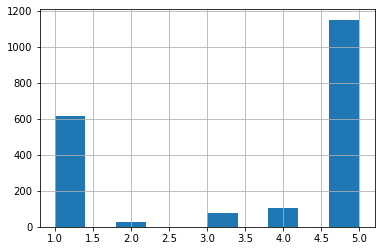

In [46]:
df['별점'].hist()


In [47]:
# 4점, 5점인 리뷰 -> 긍정적인 리뷰 ->1를 부여
# 1 ~ 3점 리뷰 -> 부정적인 리뷰 -> 0을 부여


def rating_to_label(rating):
    if rating > 3:
        return 1
    else:
        return 0
    
df['y'] = df['별점'].apply(lambda x: rating_to_label(x))

In [50]:
df.head()

,리뷰내용,별점,리뷰공감수,y
0,"검수기준이 분명하게 ""기본 품질 확인 및 정가품 판정업무를 수행하고 있습니다."" 라...",1,403,0
1,발매정보 확인할 때 유용하게 사용중입니다 다만 푸시알림으로 모든 신발에 대해서라도 ...,5,708,1
2,"검수, 배송기간은 일정하지 않은듯 하고...검수가 비교적 신뢰성있는 편이긴 하지만 ...",2,954,0
3,"스타일에 올린 사진 수정 기능이 부족해요. 사진 순서 바꾸기, 여러 장 올렸을 때 ...",3,3,0
4,기존 비밀번호도 틀리다하고 새로 바꿨더니 그것도 틀리다하고 한번 더 했더니 로그인 ...,1,8,0


In [51]:
df["y"].value_counts()

1    1256
0     717
Name: y, dtype: int64

In [52]:
from sklearn.model_selection import train_test_split

x = tf_idf_vect
y = df['y']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state=1)

In [53]:
x_train.shape, y_train.shape

((1381, 2019), (1381,))

In [54]:
x_test.shape, y_test.shape

((592, 2019), (592,))

In [55]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# fit in training set
lr = LogisticRegression(random_state = 0)
lr.fit(x_train, y_train)

# predict in test set
y_pred = lr.predict(x_test)

In [56]:
# classification result for test set

print('accuracy: %.2f' % accuracy_score(y_test, y_pred))
print('precision: %.2f' % precision_score(y_test, y_pred))
print('recall: %.2f' % recall_score(y_test, y_pred))
print('F1: %.2f' % f1_score(y_test, y_pred))

accuracy: 0.84
precision: 0.81
recall: 0.98
F1: 0.89


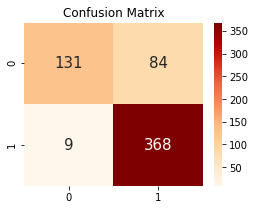

In [57]:
# confusion matrix

from sklearn.metrics import confusion_matrix

confu = confusion_matrix(y_true = y_test, y_pred = y_pred)

plt.figure(figsize=(4, 3))
sns.heatmap(confu, annot=True, annot_kws={'size':15}, cmap='OrRd', fmt='.10g')
plt.title('Confusion Matrix')
plt.show()